In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_rel
import numpy as np

bhv_file = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\bhv\combined_participant_bhv_data.csv"
data = pd.read_csv(bhv_file)

plots_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\plots"

In [16]:
data

,sub_ID,age,sex,handedness,rating_for_oldnew,rating_for_left_right,rejected_trials_count,rejected_trials_count_congruent,rejected_trials_count_incongruent,unknown_count,...,correctold_congruent_rate,correctold_incongruent_rate,incorrectold_congruent_rate,incorrectold_incongruent_rate,correctold_correctloc_congruent_rate,correctold_incorrectloc_congruent_rate,correctold_unknownloc_congruent_rate,correctold_correctloc_incongruent_rate,correctold_incorrectloc_incongruent_rate,correctold_unknownloc_incongruent_rate
0,F103,28,2,2,20,80,4,1,3,26,...,0.644068,0.631579,0.355932,0.368421,0.789474,0.055556,0.101695,0.087719,0.298246,0.245614
1,F104,22,1,2,88,90,6,2,4,29,...,0.724138,0.750000,0.275862,0.250000,0.333333,0.380952,0.206897,0.303571,0.303571,0.142857
2,F105,20,1,2,84,78,6,2,4,21,...,0.913793,0.892857,0.086207,0.107143,0.603774,0.260000,0.137931,0.178571,0.660714,0.053571
3,F106,29,1,2,100,100,15,7,8,20,...,0.716981,0.750000,0.283019,0.250000,0.578947,0.256410,0.113208,0.288462,0.307692,0.153846
4,F107,20,1,23,56,89,11,5,6,6,...,0.672727,0.500000,0.327273,0.500000,0.729730,0.296296,0.036364,0.240741,0.222222,0.037037
5,F108,30,2,2,72,68,1,0,1,15,...,0.966667,1.000000,0.033333,0.000000,0.396552,0.525424,0.066667,0.457627,0.406780,0.135593
6,F109,25,1,2,47,55,0,0,0,22,...,0.600000,0.616667,0.400000,0.383333,0.361111,0.324324,0.183333,0.316667,0.250000,0.050000
7,F111,23,1,2,29,29,1,1,0,26,...,0.796610,0.750000,0.203390,0.250000,0.361702,0.466667,0.152542,0.316667,0.300000,0.133333
8,F112,24,1,2,66,91,2,1,1,5,...,0.508475,0.593220,0.491525,0.406780,0.466667,0.400000,0.033898,0.338983,0.203390,0.050847
9,F113,22,2,2,21,51,1,0,1,3,...,0.916667,0.864407,0.083333,0.135593,0.800000,0.196078,0.016667,0.406780,0.457627,0.000000


In [17]:
print(f"Number of participants: {len(data)}")
print(f"Number of males: {np.count_nonzero(data["sex"].values == 2)}")
print(f"Number of females: {len(data) - np.count_nonzero(data["sex"].values == 2)}")

Number of participants: 19
Number of males: 7
Number of females: 12


In [18]:
age = data["age"].values
print(f"Mean age: {np.mean(age):.2f}")
print(f"STD age: {np.std(age):.2f}")
print(f"Min age: {np.min(age)}")
print(f"Max age: {np.max(age)}")

Mean age: 24.21
STD age: 3.66
Min age: 18
Max age: 33


In [19]:
unknown = data["unknown_count"].values
print(f"Mean unknown: {np.mean(unknown)}")
print(f"sts unknown: {np.std(unknown)}")

Mean unknown: 12.631578947368421
sts unknown: 10.306924225034809


In [20]:
print(f"Mean number rejected trials: {np.mean(data["rejected_trials_count"].values)}")
print(f"STD number rejected trials: {np.std(data["rejected_trials_count"].values):.2f}")

Mean number rejected trials: 3.6842105263157894
STD number rejected trials: 3.96


# SoA Ratings

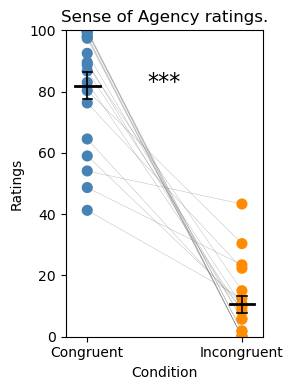

p-value = 0.00000
t statistic = 10.872
Cohen's d = 2.494
Cong : Mean=81.96, STD=18.73
Incong : Mean=10.59, STD=11.60


In [21]:
# Extract data
value1 = data['mean_a_rating_congruent'].values
value2 = data['mean_a_rating_incongruent'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(value1, value2)

# Calculate means and standard errors
means = [np.mean(value1), np.mean(value2)]
errors = [np.std(value1, ddof=1) / np.sqrt(len(data)), 
          np.std(value2, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [value1[i], value2[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (color overlay)
    z_front = 5
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
      # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position 
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8 

    # Star text
    plt.text(0.5, star_y - 15, '***', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Ratings")
plt.xlabel("Condition")
plt.ylim(0, 100)
plt.title("Sense of Agency ratings.")
plt.tight_layout()
plt.savefig(rf"{plots_folder}\SoA ratings.png",dpi = 1200)
plt.show()

# Paired t-test
t_stat, p_value = stats.ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

# Item memory

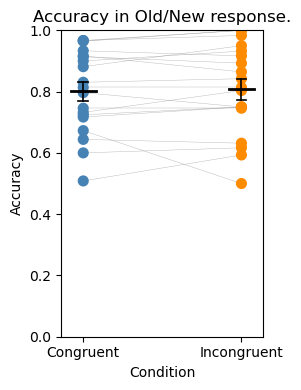

p-value = 0.66846
t statistic = -0.435
Cohen's d = -0.100
Cong : Mean=0.80, STD=0.13
Incong : Mean=0.81, STD=0.14


In [22]:
# Extract data
value1 = data['correctold_congruent_rate'].values
value2 = data['correctold_incongruent_rate'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(value1, value2)

# Calculate means and standard errors
means = [np.mean(value1), np.mean(value2)]
errors = [np.std(value1, ddof=1) / np.sqrt(len(data)), 
          np.std(value2, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [value1[i], value2[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (color overlay)
    z_front = 5
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
      # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position 
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 8 

    # Star text
    plt.text(0.5, star_y - 15, '***', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.title("Accuracy in Old/New response.")
plt.tight_layout()
plt.savefig(rf"{plots_folder}\Accuracy Old-New.png",dpi = 1200)
plt.show()

# Paired t-test
t_stat, p_value = stats.ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

# Location memory

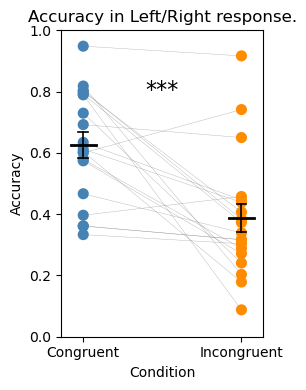

p-value = 0.00034
t statistic = 4.408
Cohen's d = 1.011
Cong : Mean=0.63, STD=0.18
Incong : Mean=0.39, STD=0.19


In [23]:
# Extract data
value1 = data['correctold_correctloc_congruent_rate'].values
value2 = data['correctold_correctloc_incongruent_rate'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(value1, value2)

# Calculate means and standard errors
means = [np.mean(value1), np.mean(value2)]
errors = [np.std(value1, ddof=1) / np.sqrt(len(data)), 
          np.std(value2, ddof=1) / np.sqrt(len(data))]

# X positions
x_positions = [0, 1]

# Start plot
plt.figure(figsize=(3, 4))

# Bar colors
colors = ['steelblue', 'darkorange']

# Add paired lines and gray dots
for i in range(len(subjects)):
    x = x_positions
    y = [value1[i], value2[i]]
    plt.plot(x, y, color='gray', alpha=0.6, zorder=1, linewidth=0.3)
    plt.scatter(x, y, color=colors, edgecolor=colors, zorder=1, alpha=1, linewidth=2)

# Plot mean lines with black outline and colored overlay
line_width = 2

# For each condition
for i, (x, mean, err, color) in enumerate(zip(x_positions, means, errors, colors)):
    # Mean line (color overlay)
    z_front = 5
    plt.plot([x - 0.08, x + 0.08], [mean, mean], color="black", linewidth=line_width, zorder=z_front+10)
    
    # Standard error band (± SEM)
      # higher than other elements

    plt.plot([x, x], [mean - err, mean + err], color='black', linewidth=1.2, zorder=z_front+1)
    plt.plot([x - 0.03, x + 0.03], [mean - err, mean - err], color='black', linewidth=1.2, zorder=z_front-1)
    plt.plot([x - 0.03, x + 0.03], [mean + err, mean + err], color='black', linewidth=1.2, zorder=z_front-1)


# Add significance star if p < 0.05
if p_value < 0.05:
    # Define star position 
    max_y = max(means[0] + errors[0], means[1] + errors[1])
    star_y = max_y + 0.8 

    # Star text
    plt.text(0.5, star_y - 0.7, '***', ha='center', va='bottom', fontsize=16)

# Tweak labels and layout
plt.xticks(x_positions, ['Congruent', 'Incongruent'])
plt.ylabel("Accuracy")
plt.xlabel("Condition")
plt.ylim(0, 1)
plt.title("Accuracy in Left/Right response.")
plt.tight_layout()
plt.savefig(rf"{plots_folder}\Acc-location.png",dpi = 1200)
plt.show()

# Paired t-test
t_stat, p_value = stats.ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

# Subjective ratings

In [24]:
# Extract data
value1 = data['rating_for_oldnew'].values
value2 = data['rating_for_left_right'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

t_stat, p_value = stats.ttest_1samp(value1, 50)
print("\nCongruent:")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

t_stat, p_value = stats.ttest_1samp(value2, 50)
print("\nIncongruent")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

p-value = 0.03341
t statistic = -2.303
Cohen's d = -0.528
Cong : Mean=57.16, STD=27.11
Incong : Mean=69.00, STD=23.96

Congruent:
p-value = 0.27740
t statistic = 1.120

Incongruent
p-value = 0.00345
t statistic = 3.365


# Control analysis

In [25]:
# Get values
value1 = data["mean_choice_rt_congruent"].values
value2 = data["mean_choice_rt_incongruent"].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.2f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

p-value = 0.24
t statistic = -1.211
Cohen's d = -0.278
Cong : Mean=1.26, STD=0.30
Incong : Mean=1.28, STD=0.31


In [26]:
# Extract data
value1 = data['left_choice_proportion_congruent'].values
value2 = data['left_choice_proportion_incongruent'].values
subjects = data['sub_ID'].values

# Paired t-test
t_stat, p_value = ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

t_stat, p_value = stats.ttest_1samp(value1, 0.5)
print("\nCongruent:")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

t_stat, p_value = stats.ttest_1samp(value2, 0.5)
print("\nIncongruent")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

p-value = 0.11017
t statistic = 1.680
Cohen's d = 0.385
Cong : Mean=0.50, STD=0.10
Incong : Mean=0.48, STD=0.10

Congruent:
p-value = 0.90300
t statistic = 0.124

Incongruent
p-value = 0.30412
t statistic = -1.058


In [27]:
# Get values
value1 = data['correctold_rate_HIT'].values
value2 = data['new_incorrectold_rate_FA'].values

# Paired t-test
t_stat, p_value = stats.ttest_rel(value1, value2)

# Compute Cohen's d for paired samples
diff = value1 - value2
mean_diff = np.mean(diff)
std_diff = np.std(diff, ddof=1)
cohens_d = mean_diff / std_diff

# Print results
print(f"p-value = {p_value}")
print(f"t statistic = {t_stat:.3f}")
print(f"Cohen's d = {cohens_d:.3f}")
print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")



p-value = 5.367675603544481e-08
t statistic = 8.881
Cohen's d = 2.037
Cong : Mean=0.80, STD=0.13
Incong : Mean=0.31, STD=0.20


In [28]:
# Extract data
value1 = data['correctold_correctloc_congruent_rate'].values
value2 = data['correctold_correctloc_incongruent_rate'].values
subjects = data['sub_ID'].values

print(f"Cong : Mean={np.mean(value1):.2f}, STD={np.std(value1):.2f}")
print(f"Incong : Mean={np.mean(value2):.2f}, STD={np.std(value2):.2f}")

t_stat, p_value = stats.ttest_1samp(value1, 0.33)
print("\nCongruent:")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

t_stat, p_value = stats.ttest_1samp(value2, 0.33)
print("\nIncongruent")
print(f"p-value = {p_value:.5f}")
print(f"t statistic = {t_stat:.3f}")

Cong : Mean=0.63, STD=0.18
Incong : Mean=0.39, STD=0.19

Congruent:
p-value = 0.00000
t statistic = 7.178

Incongruent
p-value = 0.22656
t statistic = 1.252
